# Datala Analysis - AJAX

## Introduction

Currently, sports are heavily surrounded by data, both in terms of performance and business. We are going to seize this moment and these technologies to delve into the management of a team such as Ajax in order to make decisions that add value to the club.

### Main goal

We would like to know which player we should sign, considering that we would want to acquire a young player with great potential at a good price.

### Secondary objetives

- Explore the data we have to identify potential relationships between variables.
- Group the player types to better visualize important characteristics among them.
- Examine if age correlates with the variables we've identified as important for our study.
- Find a way to select the best player.

## Exploratory

### Libraries and Data Ingestion

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
pd.read_csv('Fifa 23 Players Data.csv')
pd.set_option('display.max_columns', None)

In [12]:
fifa = pd.read_csv('Fifa 23 Players Data.csv')

# The column names have some signs that we have to clean

fifa.columns = [col.strip() for col in fifa.columns]
fifa.columns = fifa.columns.str.replace(' ', '_')

In [13]:
fifa2 = fifa.copy()
column_names = fifa2.columns
fifa2.head(5)

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,Height(in_cm),Weight(in_kg),TotalStats,BaseStats,Club_Name,Wage(in_Euro),Release_Clause,Club_Position,Contract_Until,Club_Jersey_Number,Joined_On,On_Loan,Preferred_Foot,Weak_Foot_Rating,Skill_Moves,International_Reputation,National_Team_Name,National_Team_Image_Link,National_Team_Position,National_Team_Jersey_Number,Attacking_Work_Rate,Defensive_Work_Rate,Pace_Total,Shooting_Total,Passing_Total,Dribbling_Total,Defending_Total,Physicality_Total,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,LongPassing,BallControl,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,ST_Rating,LW_Rating,LF_Rating,CF_Rating,RF_Rating,RW_Rating,CAM_Rating,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


### General analysis of the information

We would like to analyze the different characteristics for player types. To do this, we will create a new column where we will group the different positions into more general categories of player types and see which skills they excel in.

In [14]:
# There are significant outliers in players over 40 year old ,so let's remove them
fifa2 = fifa2[fifa2['Age'] <= 40]

# I want to separate players by main positions and create a new column

position_mapping = {
    'LWB': 'Defense',
    'LB': 'Defense',
    'CB': 'Defense',
    'RB': 'Defense',
    'RWB': 'Defense',
    'Center_CDM': 'Midfield',
    'CM': 'Midfield',
    'LM': 'Midfield',
    'RM': 'Midfield',
    'CAM': 'Midfield',
    'GK': 'Goalkeeper',
    'LW': 'Attack',
    'LF': 'Attack',
    'CF': 'Attack',
    'RF': 'Attack',
    'RW': 'Attack',
    'ST': 'Attack'
}

# Function to assign the category to each position
def assign_category(position):
    return position_mapping.get(position, 'Other')

# Apply the function to create a new column 'Position_Category'
fifa2['Position_Category'] = fifa2['Best_Position'].apply(assign_category)


In [15]:
# these are the features that we want to examine for each position
features_position = ['Crossing','Finishing','Heading_Accuracy','Short_Passing','Volleys','Dribbling','Curve','Freekick_Accuracy',
       'LongPassing','BallControl','Acceleration','Sprint_Speed','Agility','Reactions','Balance','Shot_Power','Jumping',
       'Stamina','Strength','Long_Shots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
       'Marking','Standing_Tackle','Sliding_Tackle']

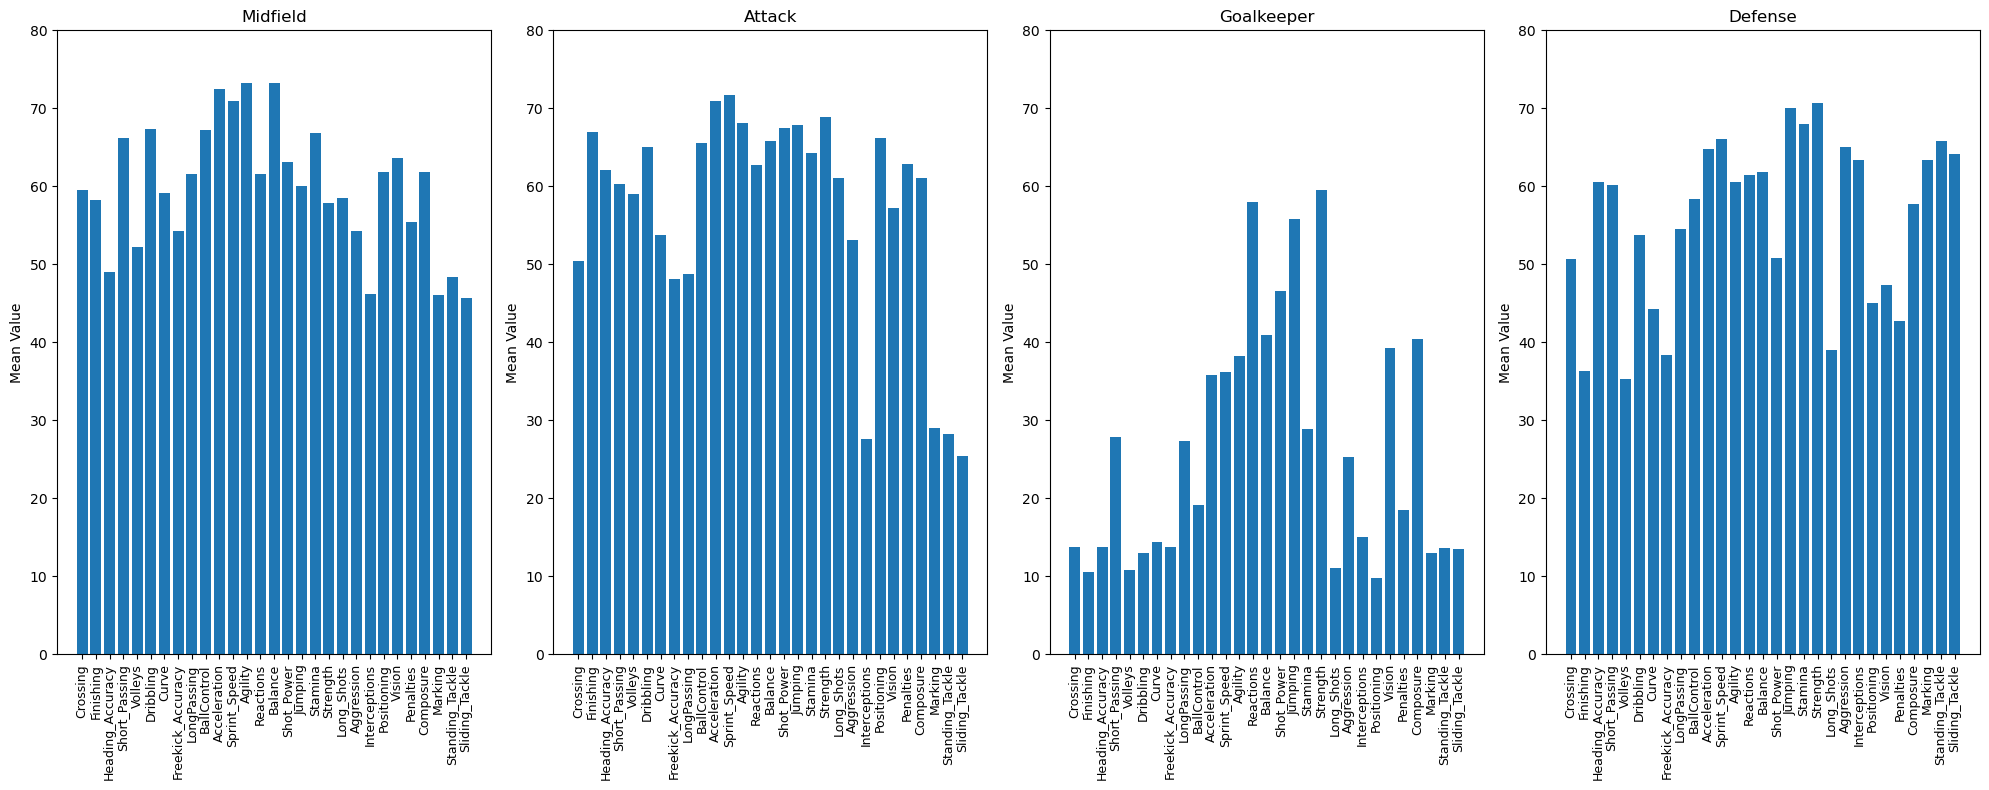

In [16]:
# This is de code for this porpose
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

position_categories = fifa2['Position_Category'].unique()[:4]

for idx, position in enumerate(position_categories):
    ax = axes[idx]
    subset = fifa2[fifa2['Position_Category'] == position]
    means = subset[features_position].mean()
    ax.bar(features_position, means)
    ax.set_title(f'{position}')
    ax.set_xticks(range(len(features_position)))  
    ax.set_xticklabels(features_position, rotation=90, fontsize=9)  
    ax.set_ylabel('Mean Value')
    ax.set_ylim(0, 80) 

plt.tight_layout()
plt.show()

Using these plots, we can appreciate the average primary characteristics of each player type. Given that we are focusing on replacing a goalkeeper, we will emphasize that the three most important characteristics for them are **reactions, strenght and jumping**.

### Correlation among numeric columns

We would like to see how the numeric columns correlate with each other to check if they provide relevant information.

In [17]:
# We drop all the columns that are addinf info that we don't need for the next analysis

columns_to_drop = ['Known_As', 'Image_Link','Height(in_cm)', 'Weight(in_kg)', 'TotalStats', 'BaseStats',
       'Club_Position', 'Club_Jersey_Number', 'Joined_On', 'On_Loan','Preferred_Foot', 'Weak_Foot_Rating',
       'International_Reputation', 'National_Team_Name','National_Team_Image_Link','National_Team_Jersey_Number',
       'Crossing','Finishing','Heading_Accuracy','Short_Passing','Volleys','Dribbling','Curve','Freekick_Accuracy',
       'LongPassing','BallControl','Acceleration','Sprint_Speed','Agility','Reactions','Balance','Shot_Power','Jumping',
       'Stamina','Strength','Long_Shots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
       'Marking','Standing_Tackle','Sliding_Tackle','Goalkeeper_Diving','Goalkeeper_Handling','GoalkeeperKicking',
       'Goalkeeper_Positioning','Goalkeeper_Reflexes','ST_Rating','LW_Rating','LF_Rating','CF_Rating','RF_Rating',
       'RW_Rating','CAM_Rating','LM_Rating','CM_Rating','RM_Rating','LWB_Rating','CDM_Rating','RWB_Rating','LB_Rating',
       'CB_Rating','RB_Rating','GK_Rating','Contract_Until', 'Skill_Moves',
       'National_Team_Position', 'Attacking_Work_Rate', 'Defensive_Work_Rate',
       'Pace_Total', 'Shooting_Total', 'Passing_Total', 'Dribbling_Total']

fifa_cleaned = fifa2.drop(columns = columns_to_drop)

# Save cleaned data for future use
fifa_cleaned.to_csv('fifa_cleaned.csv')

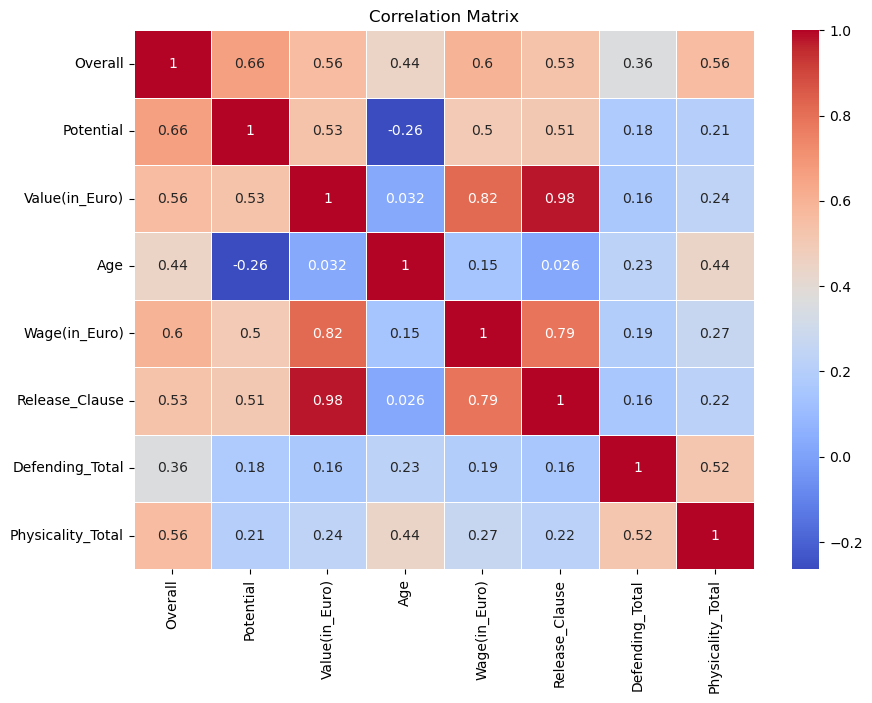

In [18]:
fifa_num_cor = fifa_cleaned.select_dtypes(include = [np.number])
correlation_matrix = fifa_num_cor.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
      


We can find a strong correlation between **Potential, Overall, Value, Wage,** and **Release Clause**. On the other hand, we observe that **age** correlates well with **Overall** and **Physicality**.

### Analysis by age: Potential, Value and Overall

We consider it important to perform an analysis by age, as we would like to sign a young player who can give us his best years.

In [19]:
# Let's take a look over these aspects

grouped_age = fifa2.groupby('Age').agg({'Potential': 'mean', 'Value(in_Euro)': 'mean', 'Overall': 'mean', 'Release_Clause':'mean'})

top_3_potential_byage = grouped_age.sort_values(by='Potential', ascending=False).head(3)

top_3_potential_byage

,Potential,Value(in_Euro),Overall,Release_Clause
Age,,,,
17,74.373494,692570.281124,56.381526,1.650398e+06
18,73.984026,754201.277955,58.070288,1.586059e+06
16,73.806452,378064.516129,54.548387,8.887419e+05


We will use graphics to see the relationship between Age and these variables: Value, Overall, and Clause.

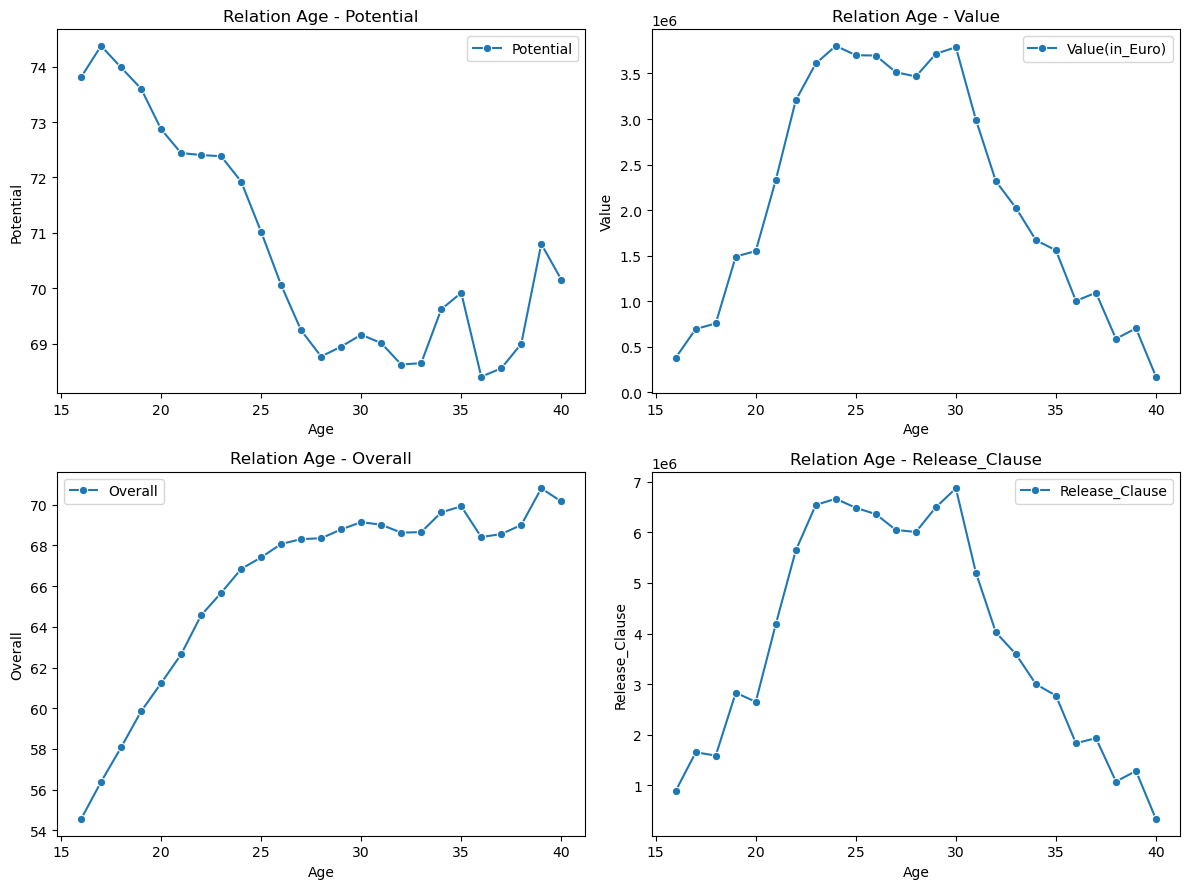

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

sns.lineplot(data=grouped_age, x='Age', y='Potential', label='Potential', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Relation Age - Potential')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Potential')

sns.lineplot(data=grouped_age, x='Age', y='Value(in_Euro)', label='Value(in_Euro)', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Relation Age - Value')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Value')

sns.lineplot(data=grouped_age, x='Age', y='Overall', label='Overall', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Relation Age - Overall')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Overall')

sns.lineplot(data=grouped_age, x='Age', y='Release_Clause', label='Release_Clause', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Relation Age - Release_Clause')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Release_Clause')

plt.tight_layout()
plt.show()

- **Age - Potential:** The trend is to have very high potential when you are young, from 16 to 20 years old, and it decreases once your value as a player consolidates.
- **Age - Value:** The value grows significantly from the ages of 16 to 25, with a period of relative stability until the age of 30, at which point it plummets.
- **Age - Overall:** It grows almost exponentially and continues until the end of their professional career.
- **Age - Release Clause:** It has a low price until the age of 20 and experiences a significant increase until the age of 23 when it stabilizes until reaching the age of 30, at which point this price decreases.

We find interesting to analyze this data for each of the player groups: goalkeepers, forwards, defenders, and midfielders.

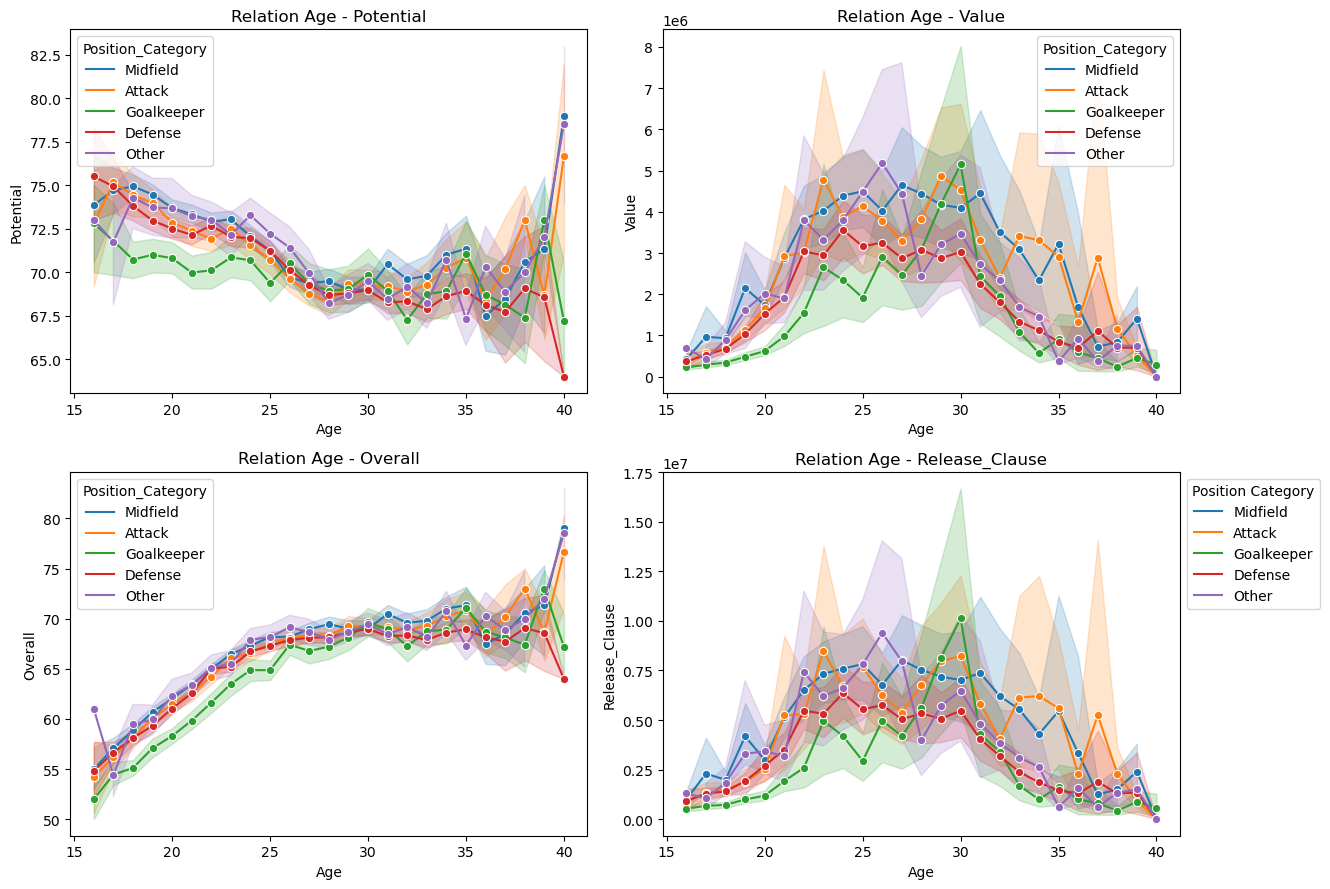

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

sns.lineplot(data=fifa2, x='Age', y='Potential', hue='Position_Category', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Relation Age - Potential')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Potential')

sns.lineplot(data=fifa2, x='Age', y='Value(in_Euro)', hue='Position_Category', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Relation Age - Value')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Value')

sns.lineplot(data=fifa2, x='Age', y='Overall', hue='Position_Category', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Relation Age - Overall')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Overall')

sns.lineplot(data=fifa2, x='Age', y='Release_Clause', hue='Position_Category', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Relation Age - Release_Clause')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Release_Clause')

plt.tight_layout()
plt.legend(title='Position Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Despite not differing much from each other in terms of the position group they belong to, we can clearly see that:

- Their **potential** is slightly lower than that of the others, especially at older ages.
- Their **value** is also lower throughout their careers, except for goalkeepers, which are below, although they clearly surpass others at the peak, which occurs at the age of 30.
- The **overall** does not show significant differences.
- The **release clause** tends to be below that of the others, but at the age of 30, it spikes and surpasses the average of the other positions.

In [22]:
# Correlation between Age and Potential
cor_age_pot = fifa2['Age'].corr(fifa2['Potential'])
cor_age_pot

-0.2638692227488566

In [23]:
# Correlation between Age and Value
cor_age_val = fifa2['Age'].corr(fifa2['Value(in_Euro)'])
cor_age_val

0.031621740957541694

In [24]:
# Correlation between Age and Overall
cor_age_ovr = fifa2['Age'].corr(fifa2['Overall'])
cor_age_ovr

0.44340267056657345

We can see that most interesting players to adquire are those between 18 an 21 year old, so they still have a low release clause, and their value and overall tend to increase. Besides, they still have a huge potential.

The correlation between Age and Potential is negative, so the more time past, the less potential they have. In the other hand, there is a positive correlation with Overall results. The correlation with value doesn't say anything, probably because there is a bell shape for this data.

## Prediction of Value based on Age for GoalKeepers

Let's create a predictive model that tells us, based on the player's age, assuming they play in a defensive position, and their three main characteristics have values above 60, what their value will be.

In [25]:
from sklearn.linear_model import LinearRegression

#let's create a new df where we select only Defense players with an Overall over 80
fifa_cb = fifa2[(fifa2['Position_Category'] == 'Goalkeeper') & (fifa2['Overall'] > 80)& (fifa2['Reactions'] > 60)& (fifa2['Strength'] > 60)& (fifa2['Jumping'] > 60)]

x_age = fifa_cb['Age'].values  
y_value = fifa_cb['Value(in_Euro)'].values 
model = LinearRegression()

x_age = x_age.reshape(-1, 1) 
y_value = y_value.reshape(-1, 1)  

model.fit(x_age, y_value)

# These are the ages where I want to predict the value
x_new_values = [16, 18, 20, 22, 35]  

for x_new in x_new_values:
    y_pred = model.predict([[x_new]])
    print(f"The value predicted for a CB player with {x_new}yo is {y_pred[0][0]:.2f}€")


The value predicted for a CB player with 16yo is 88972615.86€
The value predicted for a CB player with 18yo is 81001873.50€
The value predicted for a CB player with 20yo is 73031131.15€
The value predicted for a CB player with 22yo is 65060388.79€
The value predicted for a CB player with 35yo is 13250563.46€


### AJAX Exploration

Now, let's do an exploration of our own current team, AJAX.

### Our team

In [26]:
ajax = fifa2[fifa2['Club_Name'] == 'Ajax']
ajax.head(5)

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,Height(in_cm),Weight(in_kg),TotalStats,BaseStats,Club_Name,Wage(in_Euro),Release_Clause,Club_Position,Contract_Until,Club_Jersey_Number,Joined_On,On_Loan,Preferred_Foot,Weak_Foot_Rating,Skill_Moves,International_Reputation,National_Team_Name,National_Team_Image_Link,National_Team_Position,National_Team_Jersey_Number,Attacking_Work_Rate,Defensive_Work_Rate,Pace_Total,Shooting_Total,Passing_Total,Dribbling_Total,Defending_Total,Physicality_Total,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,LongPassing,BallControl,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,ST_Rating,LW_Rating,LF_Rating,CF_Rating,RF_Rating,RW_Rating,CAM_Rating,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating,Position_Category
97,D. Tadić,Dušan Tadić,84,84,26500000,"LW,CF,CAM",LW,Serbia,https://cdn.sofifa.net/players/199/434/23_60.png,33,181,76,2106,439,Ajax,32000,37100000,RW,2024,10,2018,-,Left,3,4,3,-,-,-,-,Medium,Medium,68,81,86,84,43,77,88,83,66,87,80,84,85,79,80,87,68,68,73,84,84,79,59,88,81,77,56,41,85,88,84,87,51,34,26,11,11,14,9,16,83,83,83,83,83,83,84,84,83,84,69,68,69,64,58,64,23,Attack
272,S. Berghuis,Steven Berghuis,82,82,29500000,"CAM,RW",CAM,Netherlands,https://cdn.sofifa.net/players/200/260/23_60.png,30,182,75,2065,436,Ajax,25000,41300000,CM,2025,23,2021,-,Left,3,4,3,Netherlands,https://cdn.sofifa.net/flags/nl.png,CM,11,High,Medium,80,82,83,82,40,69,85,82,48,83,77,80,86,76,82,85,83,78,84,80,75,82,55,80,63,84,72,37,82,83,83,81,44,37,30,9,11,7,7,15,81,82,81,81,81,82,82,82,81,82,68,66,68,63,54,63,21,Midfield
346,L. Ocampos,Lucas Ocampos,81,81,27500000,"RW,LW",RW,Argentina,https://cdn.sofifa.net/players/205/632/23_60.png,27,188,84,2188,465,Ajax,39000,0,SUB,2023,11,2019,TRUE,Right,3,4,2,-,https://cdn.sofifa.net/flags/ar.png,-,-,High,High,80,81,77,82,62,83,78,81,77,80,81,85,80,65,72,83,80,80,78,81,61,83,80,90,81,78,81,71,82,78,79,81,58,57,55,11,8,15,12,7,81,81,81,81,81,81,81,81,81,81,76,75,76,74,71,74,20,Attack
396,E. Álvarez,Edson Álvarez,80,84,27500000,"CDM,CM",CB,Mexico,https://cdn.sofifa.net/players/235/844/23_60.png,24,187,73,1979,432,Ajax,17000,40600000,CDM,2025,4,2019,-,Right,3,2,2,Mexico,https://cdn.sofifa.net/flags/mx.png,CDM,4,Low,High,71,57,67,69,82,86,64,57,81,76,63,68,42,40,72,71,69,73,60,76,68,70,78,87,86,40,86,83,56,63,65,72,84,81,79,7,11,10,7,6,70,66,66,66,66,66,68,71,73,71,79,81,79,80,83,80,17,Defense
405,J. Timber,Jurriën Timber,80,88,44500000,"CB,RB",CB,Netherlands,https://cdn.sofifa.net/players/251/805/23_60.png,21,179,77,1950,435,Ajax,14000,71200000,CB,2025,2,2019,-,Right,3,3,2,Netherlands,https://cdn.sofifa.net/flags/nl.png,SUB,2,High,Medium,82,47,67,77,81,81,60,41,71,80,41,76,44,31,70,78,80,83,73,78,74,58,85,81,82,46,76,82,63,64,42,85,83,83,77,6,6,8,14,14,67,69,69,69,69,69,72,74,75,74,80,81,80,80,82,80,19,Defense


In [27]:
# The number of players we have
ajax.shape

(27, 90)

Now let's see the mean of age, overall and value

In [28]:
print('Mean age:', ajax['Age'].mean())
print('Mean Overall:', ajax['Overall'].mean())
print('Mean Value(in Euro):', ajax['Value(in_Euro)'].mean())

Mean age: 23.62962962962963
Mean Overall: 74.37037037037037
Mean Value(in Euro): 13136111.111111112


Some Team Stats:

**Total Value**= 354,675,000
**Mean Value** = 1.313611e+07
**Total Wage** = 377.000
**Mean Age** = 23.6
**Min Age** = 18
**Max Age** = 39
**Mean Overall** = 74.4

After analyzing our team, positions to reinforce were considered, which are the goalkeeper and central defensive midfielder positions.

**GK - Mean Overal** = 72.5
**GK - Mean Potential** = 78

The goalkeeper position has the lowest mean of Overall in the entire squad and a potential mean below the squad's potential mean. Although it has one of the highest standard deviations among the different positions in the squad, the maximum potential value for goalkeepers is only at an overall rating of 82, a value that we aim to increase with the acquisition of a new goalkeeper.

**Defensive Midfielder** - Mean Overall =73
**Defensive Midfielder** - Mean Potential =76

The defensive central midfielder position is not currently a critical position in the squad because we have an experienced 32-year-old player with an overall rating of 80. However, this position lacks future quality, as according to the analyzed data, it has the second lowest average overall and the lowest average potential in the squad. Therefore, it is necessary to reinforce this position with a young player of high potential, even if they currently have a low overall rating, which makes it more cost-effective.

Thus, our market approach decision will be to invest a significant portion of the money obtained from transfers in a goalkeeper with a high current overall and potential for improvement. The remaining part will be invested in a young central defensive midfielder with significant potential for growth.

**Players to sell**

**Defenders**

**Gk: J. Gorter** -5.800.000
The decision to sell the GK (J. Gorter) was based on the fact that he had a higher market value and release clause (5800000) than M. Stekelenburg, which would help in acquiring the future goalkeeper. Another piece of evidence that weighed in on this decision was the fact that Gorter's potential value is 82, which falls short of the required quality for our squad. Additionally, if the goalkeeper we are going to sign gets injured, Stekelenburg currently has a higher overall rating than Gorter, providing more quality to the team if necessary. The Wage is the same, so that is not a variable to consider in this decision. Finally, Stekelenburg can contribute with his experience to the development of the prospects in our squad.

**L. Magallá** - 2.200.000
L. Magallán is a 28-year-old player who has already reached his potential, which is below the overall average of our squad. We consider this player surplus for the position and the squad, as he does not add quality to it.

**Y. Baas** - 1.800.000
Y. Baas is a young player with a potential of 75, well below the average potential of the lateral defenders (81.4) we have in the squad.

**Midfield**

**K. Fitz-Jim** -3.000.000
K. Fitz-Jim is a young player currently with the lowest overall value in our squad for the midfield position. Despite having a significant room for improvement, his potential is below the average potential of our midfield players.

**S. Berghuis** - 41.300.000
The decision to sell S. Berghuis was based on the fact that he is a 30-year-old player who has already reached his full potential. However, he is currently our best player in the midfield position. Nevertheless, in terms of future prospects and market outlook, the sale of Berghuis will yield a substantial financial gain, which will be invested in high-potential players for our positions of greatest need. The sporting aspect will be affected, but the sale will create space for the players with potential that we have for the same position to play and improve.

**D. Tadić** - 37.100.000
D. Tadić currently has the highest Overall value among the players, but he is also one of the oldest. Therefore, the decision to sell Tadić was based on the financial aspect, as the sale will provide a good financial return. However, the sporting aspect will be affected, but the sale will create space for the players with potential that we have for the same position to play and improve.??????

**Total in sells:** 91.200.000
This is the total estimated value from the sales. This value was estimated assuming that the sales will occur at the release clause value, as none of these players are at the end of their contracts. As a fair way to acquire new players, the payment of the release clause will be considered.

### Graphical representation of the relationship between variables

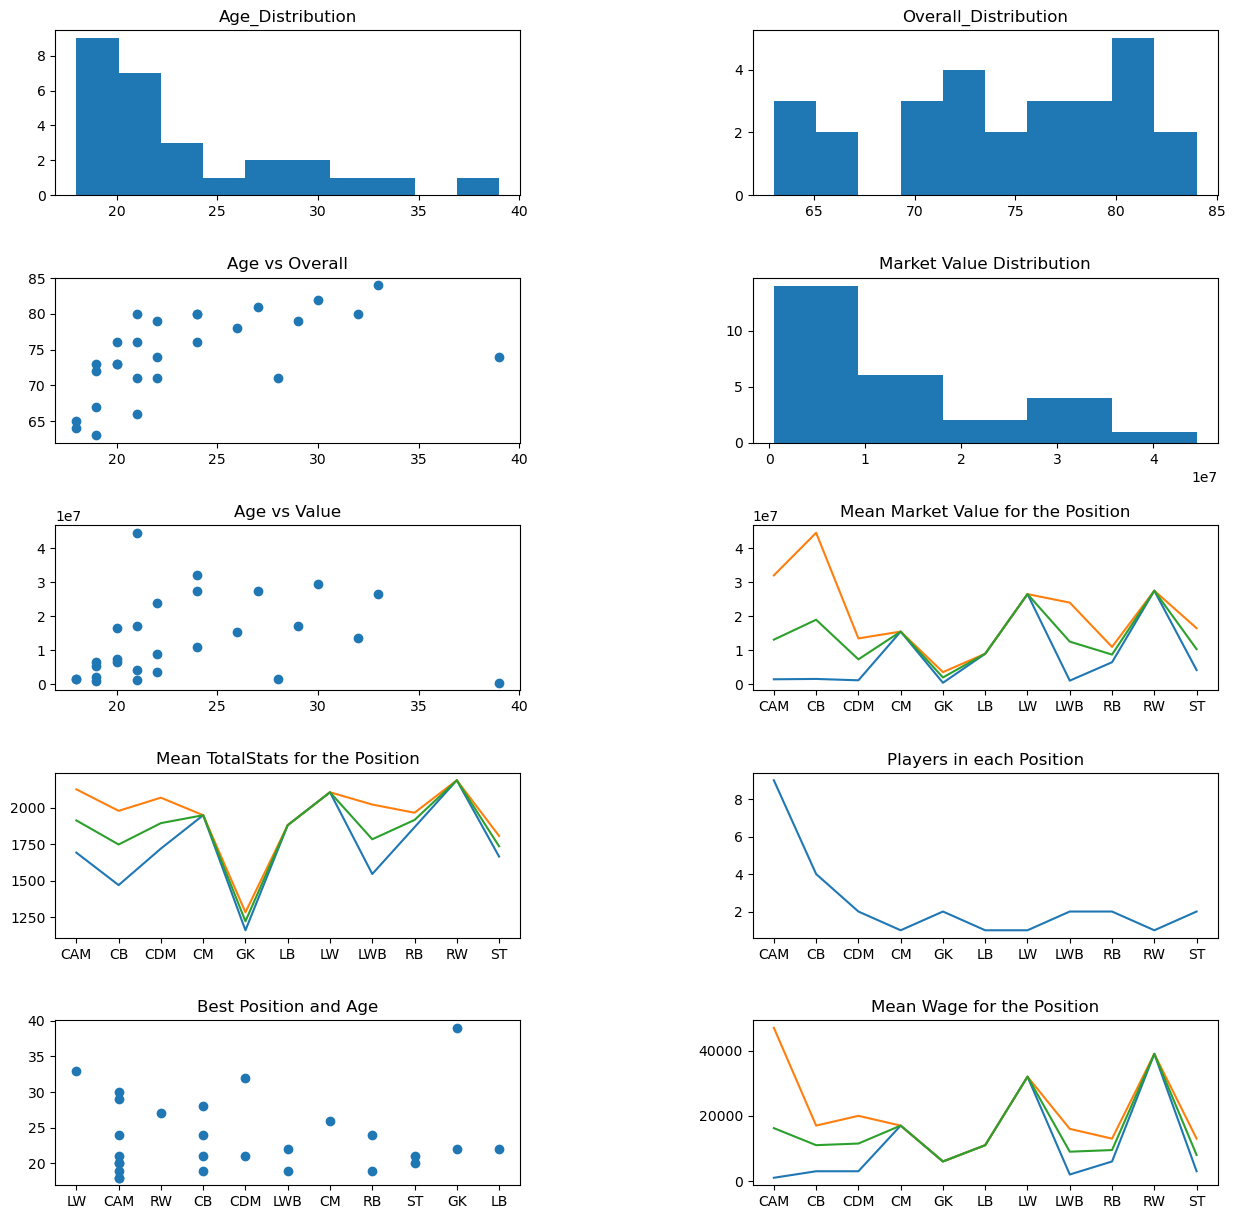

In [29]:
f, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5) 

ax[0,0].hist(ajax['Age'], bins=10)
ax[0,0].set_title('Age_Distribution')

ax[0,1].hist(ajax['Overall'], bins=10)
ax[0,1].set_title('Overall_Distribution')

ax[1,0].scatter(ajax['Age'], ajax['Overall'])
ax[1,0].set_title('Age vs Overall')

ax[1,1].hist(ajax['Value(in_Euro)'], bins=5)
ax[1,1].set_title('Market Value Distribution')

ax[2,0].scatter(ajax['Age'], ajax['Value(in_Euro)'])
ax[2,0].set_title('Age vs Value')

ax[2,1].plot(ajax.groupby('Best_Position').agg({'Value(in_Euro)': ['min', 'max', 'mean']}))
ax[2,1].set_title('Mean Market Value for the Position')

ax[3,0].plot(ajax.groupby('Best_Position').agg({'TotalStats': ['min', 'max', 'mean']}))
ax[3,0].set_title('Mean TotalStats for the Position')

ax[3,1].plot(ajax.groupby('Best_Position').agg({'Known_As': 'count'}))
ax[3,1].set_title('Players in each Position')

ax[4,0].scatter(ajax['Best_Position'], ajax['Age'])
ax[4,0].set_title('Best Position and Age')

ax[4,1].plot(ajax.groupby('Best_Position').agg({'Wage(in_Euro)': ['min', 'max', 'mean']}))
ax[4,1].set_title('Mean Wage for the Position')
plt.show()

#### Some Findings based on the above charts

- Overall, it is a very young team with mean age of 23
- There is big disparity in terms of players that are best for certain positions, for example, big group of players are there for CAM, where as other positions like CM or LW and RW just have single player that is good in that position.
- The GoalKeeper of the team is at the highest age group, and the team needs to think about a third goal keeper to ensure there is enough redundancy in case of current GK retires
- There is a player in the team, that has double market value than others
- Some players in CAM position are being paid way highers than others on the same position (or the rest of the team)

In [30]:
ajax[ajax['Position_Category'] == 'Goalkeeper'][['Overall', 'Age', 'Wage(in_Euro)']].head()

,Overall,Age,Wage(in_Euro)
2156,74,39,6000
4104,71,22,6000


Based on above data, our desired age limiting factor could be a defender that is between 17 to 22 years old. This will ensure we can have a talented defender which can be inside the team for the years to come, in case some of our players leave the temas or get the age of 30 year old.

In [31]:
desired_gk = fifa2[(fifa2['Age'] >= 17) & (fifa2['Age'] <= 22) & (fifa2['Position_Category'] == 'Goalkeeper')]
desired_gk.shape

(662, 90)

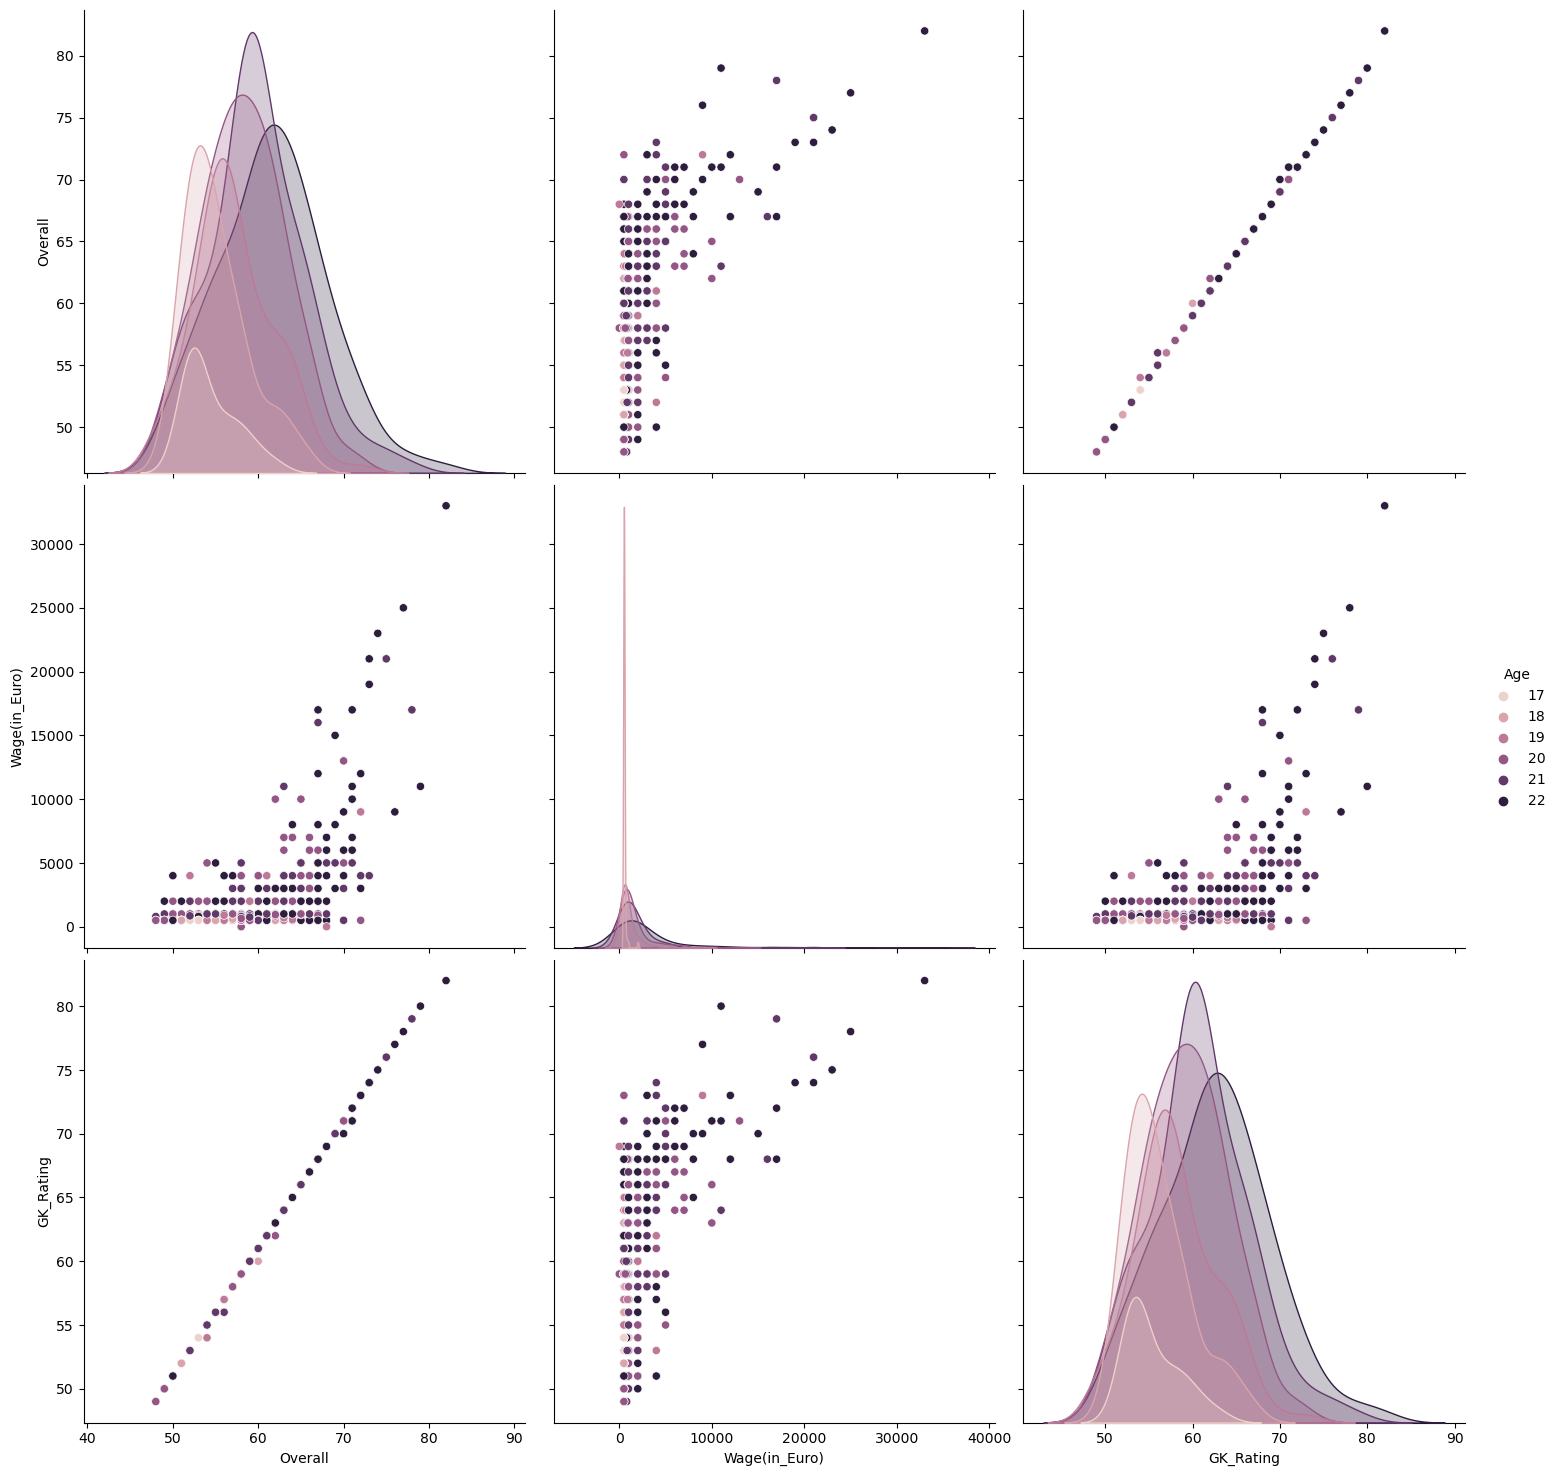

In [32]:
sns.pairplot(desired_gk[['Age','Overall', 'Wage(in_Euro)','GK_Rating']],hue='Age',height=5)


### Looking at wage factor

To reduce the list of defenders, we need to check what is the affordable wage we can pay. Current goalkeepers are having a wage around 15K.

In [33]:
ajax['Wage(in_Euro)'].mean()

13962.962962962964

In [39]:
# We limit our GK group to have wage below 15K
desired_gk = desired_gk[desired_gk['Wage(in_Euro)']<15000]

desired_gk= fifa2[['Known_As','Club_Name','GK_Rating','Best_Position','Potential','Release_Clause','Contract_Until','Age', 'Value(in_Euro)','Wage(in_Euro)','Goalkeeper_Diving', 'Goalkeeper_Handling', 'GoalkeeperKicking','Goalkeeper_Positioning', 'Goalkeeper_Reflexes']]
desired_gk=desired_gk[(desired_gk['Release_Clause'] < 54100000) & 
                                      (desired_gk['Potential'] > 80) & 
                                      (desired_gk['Age'] < 22) & 
                                      (desired_gk['Best_Position'] == 'GK')&
                                      (desired_gk['Wage(in_Euro)']<15000)]

desired_gk.head(10)

,Known_As,Club_Name,GK_Rating,Best_Position,Potential,Release_Clause,Contract_Until,Age,Value(in_Euro),Wage(in_Euro),Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes
2688,E. Green,AS Saint-Étienne,74,GK,81,12000000,2025,21,6000000,4000,72,71,74,72,75
3279,Luiz Júnior,Futebol Clube de Famalicão,73,GK,82,10600000,2027,21,4600000,4000,72,71,67,72,73
4340,G. Bazunu,Southampton,71,GK,85,8600000,2027,20,3400000,13000,70,68,72,67,72
4856,Andrew,Gil Vicente FC,71,GK,82,7800000,2024,21,3400000,3000,71,69,64,66,72
5085,M. Ramírez,Independiente del Valle,71,GK,81,7400000,2023,21,3100000,500,72,65,63,67,73
5142,M. Vandevoordt,KRC Genk,71,GK,84,7200000,2023,20,3400000,5000,73,70,65,63,73
6917,Agirrezabala,Athletic Club de Bilbao,69,GK,81,7100000,2025,21,2600000,5000,64,66,67,71,70
7904,L. Chevalier,LOSC Lille,68,GK,83,6100000,2024,20,2400000,5000,68,66,65,65,67
8671,G. Slonina,Chicago Fire Football Club,67,GK,81,0,2022,18,1700000,2000,69,62,62,65,65
9891,Samuel Soares,SL Benfica,66,GK,82,4500000,2025,20,1700000,2000,65,60,70,61,69


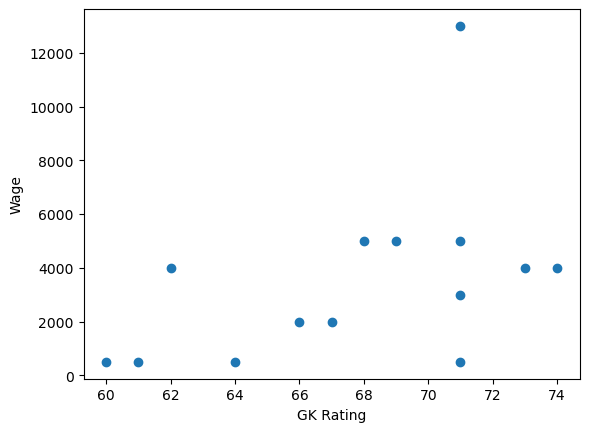

In [43]:
plt.scatter(desired_gk['GK_Rating'],desired_gk['Wage(in_Euro)'])
plt.xlabel('GK Rating')
plt.ylabel('Wage')
plt.show()

We can observe a trend that as the goalkeeper (GK) rating increases, so does their salary. For lower salaries, especially among junior players, we see a significant variability in GK ratings, but as they progress, a clearer pattern emerges.

In [45]:
desired_gk.head(10)

,Known_As,Club_Name,GK_Rating,Best_Position,Potential,Release_Clause,Contract_Until,Age,Value(in_Euro),Wage(in_Euro),Goalkeeper_Diving,Goalkeeper_Handling,GoalkeeperKicking,Goalkeeper_Positioning,Goalkeeper_Reflexes
2688,E. Green,AS Saint-Étienne,74,GK,81,12000000,2025,21,6000000,4000,72,71,74,72,75
3279,Luiz Júnior,Futebol Clube de Famalicão,73,GK,82,10600000,2027,21,4600000,4000,72,71,67,72,73
4340,G. Bazunu,Southampton,71,GK,85,8600000,2027,20,3400000,13000,70,68,72,67,72
4856,Andrew,Gil Vicente FC,71,GK,82,7800000,2024,21,3400000,3000,71,69,64,66,72
5085,M. Ramírez,Independiente del Valle,71,GK,81,7400000,2023,21,3100000,500,72,65,63,67,73
5142,M. Vandevoordt,KRC Genk,71,GK,84,7200000,2023,20,3400000,5000,73,70,65,63,73
6917,Agirrezabala,Athletic Club de Bilbao,69,GK,81,7100000,2025,21,2600000,5000,64,66,67,71,70
7904,L. Chevalier,LOSC Lille,68,GK,83,6100000,2024,20,2400000,5000,68,66,65,65,67
8671,G. Slonina,Chicago Fire Football Club,67,GK,81,0,2022,18,1700000,2000,69,62,62,65,65
9891,Samuel Soares,SL Benfica,66,GK,82,4500000,2025,20,1700000,2000,65,60,70,61,69
